# Projet Data

Visualization

In [2]:
pip install geopandas

     ---------------------------------------- 1.1/1.1 MB 5.1 MB/s eta 0:00:00
     ---------------------------------------- 5.1/5.1 MB 6.5 MB/s eta 0:00:00
     ---------------------------------------- 1.4/1.4 MB 6.7 MB/s eta 0:00:00
     ---------------------------------------- 22.0/22.0 MB 4.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [1]:
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Map

Sélectionner les données nécessaires dans la base de données

In [2]:
df = pd.read_excel("webscraping.xlsx", usecols=["Latitude", "Longitude", "Adults", "Children"])
df.head()

,Adults,Children,Latitude,Longitude
0,20,20,49.842121,4.972678
1,5,3,50.549776,5.324099
2,8,0,50.489398,5.096547
3,10,6,50.341611,4.838456
4,25.50,25.50,50.237910,4.907923


Combinez le diagramme de dispersion avec les Geopandas

In [3]:
gdf = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df.Longitude, df.Latitude))
gdf.head()

,Adults,Children,Latitude,Longitude,geometry
0,20,20,49.842121,4.972678,POINT (4.97268 49.84212)
1,5,3,50.549776,5.324099,POINT (5.32410 50.54978)
2,8,0,50.489398,5.096547,POINT (5.09655 50.48940)
3,10,6,50.341611,4.838456,POINT (4.83846 50.34161)
4,25.50,25.50,50.237910,4.907923,POINT (4.90792 50.23791)


Combiner les infos avec la carte

ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not 0         20
1          5
2          8
3         10
4      25.50
       ...  
219       10
220       45
221       25
222        5
223        3
Name: Adults, Length: 224, dtype: object

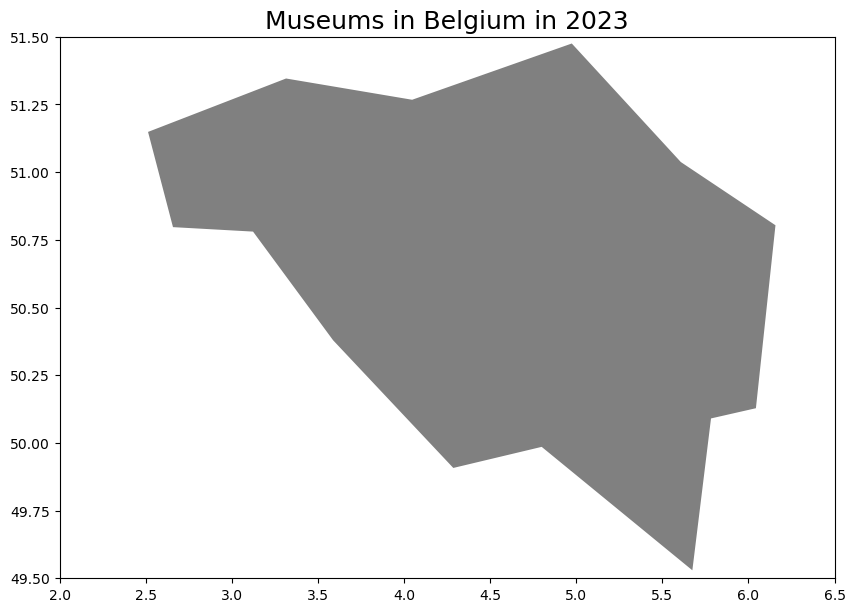

In [4]:
# Load the data
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
belgium = world[world["name"] == "Belgium"]

# Set the figure size and axis limits
fig, ax = plt.subplots(figsize=(10, 8))
ax.set_xlim([2, 6.5])
ax.set_ylim([49.5, 51.5])

# Plot the map and add a title
belgium.plot(color="grey", ax=ax)
ax.set_title("Museums in Belgium in 2023", fontsize=18)

# Plot the museum locations and add a colorbar
cmap = "Purples"
sc = ax.scatter(df["Longitude"], df["Latitude"], s=50, c=df["Adults"], cmap=cmap, edgecolors='grey', linewidths=0.5)
cbar = fig.colorbar(sc)
cbar.ax.set_ylabel("Adult ticket price (EUR)", fontsize=14)

# Add attribution text
plt.text(0.95, 0.01, "Data source: Museum websites (2023)\nMap source: Natural Earth",
         transform=ax.transAxes, fontsize=12, ha='right')

# Show the plot
plt.show()

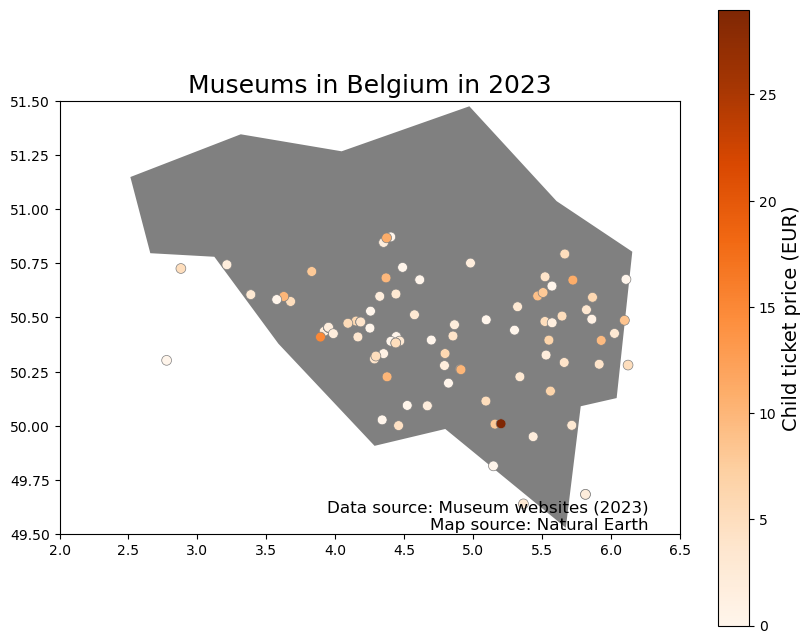

In [68]:
# Load the data
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
belgium = world[world["name"] == "Belgium"]

# Set the figure size and axis limits
fig, ax = plt.subplots(figsize=(10, 8))
ax.set_xlim([2, 6.5])
ax.set_ylim([49.5, 51.5])

# Plot the map and add a title
belgium.plot(color="grey", ax=ax)
ax.set_title("Museums in Belgium in 2023", fontsize=18)

# Plot the museum locations and add a colorbar
cmap = "Oranges"
sc = ax.scatter(df["Longitude"], df["Latitude"], s=50, c=df["Children"], cmap=cmap, edgecolors='grey', linewidths=0.5)
cbar = fig.colorbar(sc)
cbar.ax.set_ylabel("Child ticket price (EUR)", fontsize=14)

# Add attribution text
plt.text(0.95, 0.01, "Data source: Museum websites (2023)\nMap source: Natural Earth",
         transform=ax.transAxes, fontsize=12, ha='right')

# Show the plot
plt.show()

In [1]:
pip install folium

     -------------------------------------- 102.3/102.3 kB 3.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [5]:
import folium

# Create a map of Belgium
belgium_map = folium.Map(location=[50.5039, 4.4699], zoom_start=8)

# Show the map
belgium_map

In [7]:
belgium_map = folium.Map(location=[50.5039, 4.4699], zoom_start=8)

belgium_df = df[(df['Latitude'] >= 49.5) & (df['Latitude'] <= 51.5) & (df['Longitude'] >= 2.5) & (df['Longitude'] <= 6.5)]

for lat, lon in zip(belgium_df['Latitude'], belgium_df['Longitude']):
    folium.Marker(location=[lat, lon]).add_to(belgium_map)

    belgium_map

In [9]:
from folium.plugins import HeatMap
belgium_map = folium.Map(location=[50.5039, 4.4699], zoom_start=8)

belgium_df = df[(df['Latitude'] >= 49.5) & (df['Latitude'] <= 51.5) & (df['Longitude'] >= 2.5) & (df['Longitude'] <= 6.5)]

data = belgium_df[['Latitude', 'Longitude']].values.tolist()
heatmap_layer = HeatMap(data=data, min_opacity=0.3, max_val=100, radius=10, blur=5, gradient={0.2: 'blue', 0.4: 'purple', 0.6: 'orange', 1: 'red'})
heatmap_layer.add_to(belgium_map)

belgium_map

C:\Users\flori\AppData\Local\Temp\ipykernel_25268\4008482117.py:7: UserWarning: The `max_val` parameter is no longer necessary. The largest intensity is calculated automatically.
  heatmap_layer = HeatMap(data=data, min_opacity=0.3, max_val=100, radius=10, blur=5, gradient={0.2: 'blue', 0.4: 'purple', 0.6: 'orange', 1: 'red'})


## Scatter plot

See if there is a relation between the visiting time and the adult price

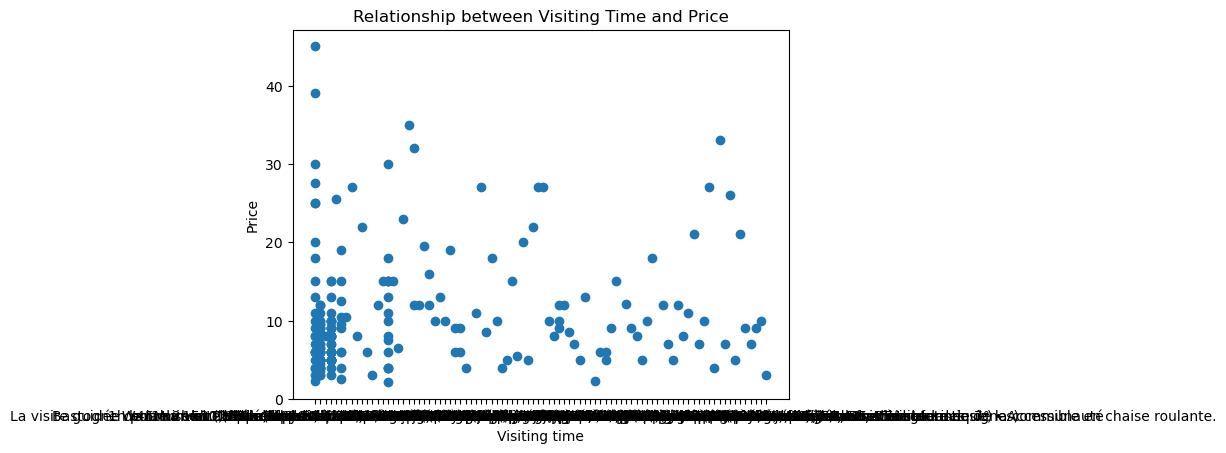

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the excel file into a pandas dataframe
df = pd.read_excel('webscraping.xlsx')
df['Adults'] = df['Adults'].str.replace('€', '').astype(float)
# Create a scatter plot of visiting time and price
plt.scatter(df['Visiting time'], df['Adults'])

# Add axis labels and title
plt.xlabel('Visiting time')
plt.ylabel('Price')
plt.title('Relationship between Visiting Time and Price')

# Show the plot
plt.show()

## Bar Chart

See how many activities there are for the 20 cities with the most activities

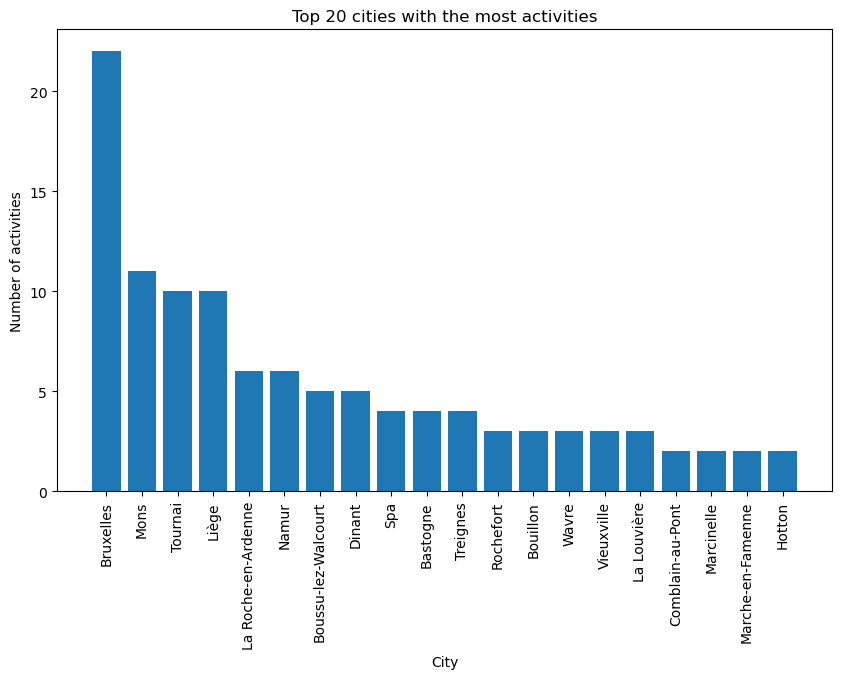

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the excel file into a pandas dataframe
df = pd.read_excel('webscraping.xlsx')

# Get the top 10 cities with the most activities
top_cities = df.groupby('City').size().sort_values(ascending=False).head(20)

# Create a bar chart of the top 10 cities and their activity count
plt.figure(figsize=(10, 6))
plt.bar(top_cities.index, top_cities.values)
plt.xticks(rotation=90)
plt.xlabel('City')
plt.ylabel('Number of activities')
plt.title('Top 20 cities with the most activities')
plt.show()

## Box plot

show the distribution of adult prices for each activity type

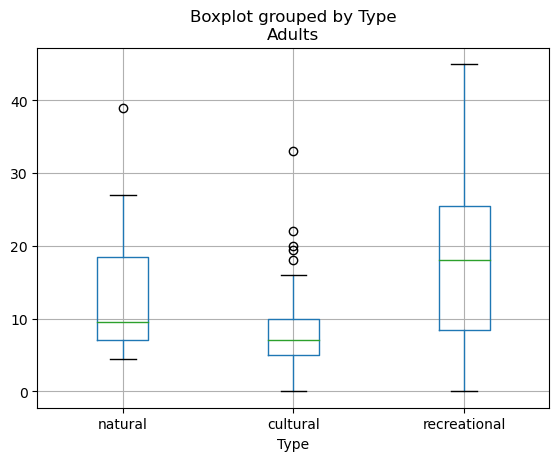

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data into a Pandas DataFrame
df = pd.read_excel('webscraping.xlsx')

# Convert price columns to numeric
df['Adults'] = pd.to_numeric(df['Adults'], errors='coerce')
df['Children'] = pd.to_numeric(df['Children'], errors='coerce')

# Drop rows with missing values
df = df.dropna()

# Create Series objects for array1 and array2
array1 = df['Adults']
array2 = df['Children']

# Calculate the result
result = array1 / array2

# Create a dictionary that maps the activity types to numeric values
activity_type_dict = {
    'natural': 1,
    'cultural': 2,
    'recreational': 3
}

# Replace the activity types with the corresponding numeric values
df['Type'] = df['Type'].replace(activity_type_dict)

# Create a box plot of prices by activity type
ax = df.boxplot(column='Adults', by='Type')

# Replace the activity type labels on the x-axis
labels = {1: 'natural', 2: 'cultural', 3: 'recreational'}
ax.set_xticklabels(labels.values())

plt.show()

The box plot shows the median price (the line inside the box), the interquartile range (the box), the whiskers (the lines extending from the box that indicate the range of values outside the box), and any outliers (represented as individual points).

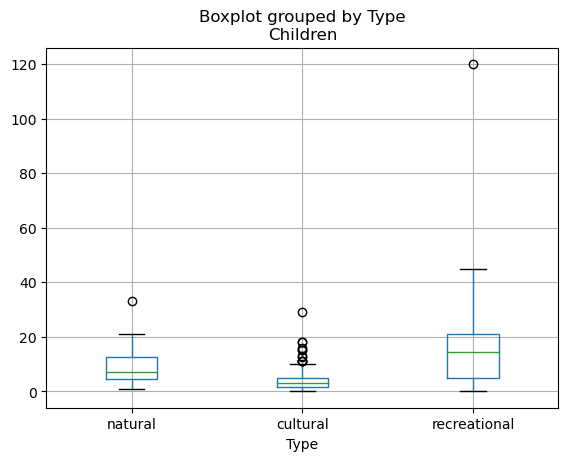

In [16]:
df = pd.read_excel('webscraping.xlsx')

# Convert price columns to numeric
df['Adults'] = pd.to_numeric(df['Adults'], errors='coerce')
df['Children'] = pd.to_numeric(df['Children'], errors='coerce')

# Drop rows with missing values
df = df.dropna()

# Create Series objects for array1 and array2
array1 = df['Adults']
array2 = df['Children']

# Calculate the result
result = array1 / array2

# Create a dictionary that maps the activity types to numeric values
activity_type_dict = {
    'natural': 1,
    'cultural': 2,
    'recreational': 3
}

# Replace the activity types with the corresponding numeric values
df['Type'] = df['Type'].replace(activity_type_dict)

# Create a box plot of prices by activity type
ax = df.boxplot(column='Children', by='Type')

# Replace the activity type labels on the x-axis
labels = {1: 'natural', 2: 'cultural', 3: 'recreational'}
ax.set_xticklabels(labels.values())

plt.show()

## Pie chart

show the percentage of each activity type in the database.

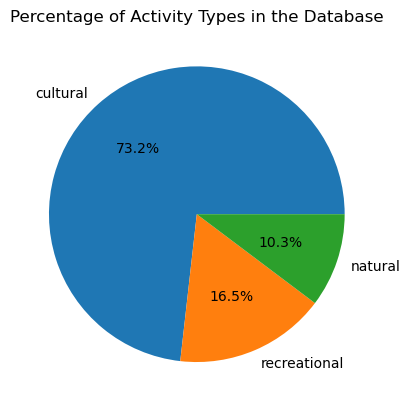

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data into a Pandas DataFrame
df = pd.read_excel('webscraping.xlsx')

# Create a dictionary that maps the activity types to their counts
activity_counts = dict(df['Type'].value_counts())

# Create a list of activity types and their counts
activity_types = list(activity_counts.keys())
activity_values = list(activity_counts.values())

# Create a pie chart
fig, ax = plt.subplots()
ax.pie(activity_values, labels=activity_types, autopct='%1.1f%%')

# Set the title of the chart
ax.set_title('Percentage of Activity Types in the Database')

# Show the chart
plt.show()

## Heatmap

show the density of activities in different regions of Belgium

<AxesSubplot:ylabel='City'>

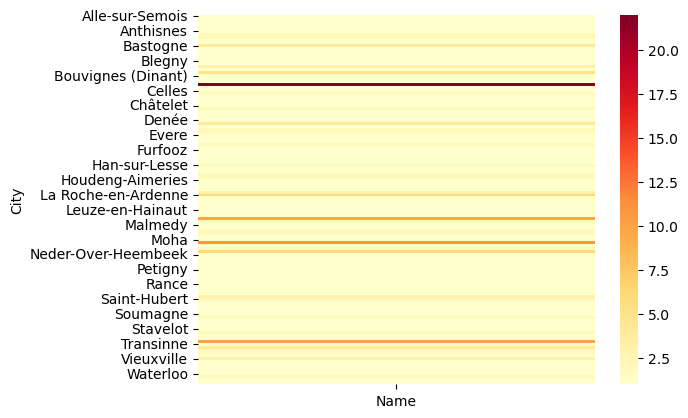

In [13]:
import pandas as pd
import seaborn as sns

# Read the data into a Pandas DataFrame
df = pd.read_excel('webscraping.xlsx')

# Group the activities by region and count the number of activities in each region
region_counts = df.groupby('City')['Name'].count()

# Create a pivot table with the counts of activities by region
pivot_table = pd.pivot_table(df, values='Name', index='City', aggfunc='count')

# Plot the pivot table as a heatmap
sns.heatmap(pivot_table, cmap='YlOrRd')